In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Dados

In [27]:
# dados = np.random.normal(1, 0.5, [100,2])
# dados.shape

X = np.vstack([np.random.normal(1, 0.5, [100,2]),
                  np.random.normal(-2, 1, [100,2]),
                  np.random.normal(3, 0.75, [100,2])]
                  )

#normalize os valores de X para cada coluna
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

y = np.hstack([np.zeros(100, dtype=int),
               np.ones(100, dtype=int),
               np.ones(100, dtype=int) + 1])

print(y.shape)

print(X.shape)

print(X)

(300,)
(300, 2)
[[0.67565009 0.62332635]
 [0.63509195 0.71937879]
 [0.68099571 0.55144967]
 [0.63361232 0.59454748]
 [0.57921348 0.6238712 ]
 [0.59198353 0.67833176]
 [0.62384865 0.60879472]
 [0.60746794 0.61985717]
 [0.66170712 0.59174006]
 [0.60071291 0.55787751]
 [0.45269324 0.63655236]
 [0.62918874 0.56371822]
 [0.70176746 0.5265545 ]
 [0.58690753 0.59267799]
 [0.66370582 0.67911893]
 [0.59254667 0.62217864]
 [0.53869394 0.49908453]
 [0.56657612 0.61060406]
 [0.64808357 0.66518756]
 [0.56454052 0.58667091]
 [0.530391   0.52834681]
 [0.49642271 0.70423999]
 [0.55822293 0.57958614]
 [0.51984275 0.64301618]
 [0.50119334 0.59134442]
 [0.53829726 0.6226347 ]
 [0.55816339 0.54083833]
 [0.5830888  0.62479655]
 [0.58797963 0.61822898]
 [0.55178426 0.58351714]
 [0.54981458 0.5836835 ]
 [0.54254875 0.51236545]
 [0.5937076  0.58147999]
 [0.50035149 0.62659422]
 [0.5376862  0.60515613]
 [0.62219872 0.60917606]
 [0.64338949 0.53801042]
 [0.60532353 0.56671109]
 [0.53957133 0.57224027]
 [0.56845

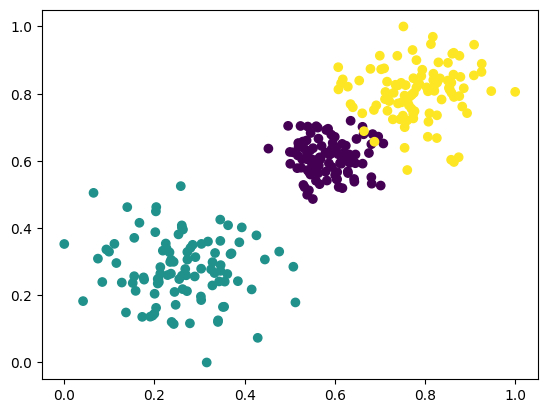

In [28]:
plt.scatter(X[:,0], X[:,1], c = y)

In [29]:
# notação one-hot
def one_hot(y):
  one_hot_y = np.zeros((len(np.unique(y)),y.size))
  one_hot_y[y,np.arange(y.size)] = 1
  return one_hot_y

print(y)
y = one_hot(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 

In [30]:
# sortear e dividir
ordem = np.random.permutation(X.shape[0])

n_train = int(0.8*X.shape[0]) # 80% dos dados para treino

y_train = y[:,ordem[:n_train]]
X_train = X[ordem[:n_train]]

y_test = y[:,ordem[n_train:]]
X_test = X[ordem[n_train:]]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 2)
(3, 240)
(60, 2)
(3, 60)


# Forward

In [31]:
# rede de 1 camada oculta
def init_params():
  # camada inicial
  #                  2 att, 10 neuronios
  W1 = np.random.rand(2, 10) - 0.5 # distr uniforme
  b1 = np.random.rand(1, 10) - 0.5
  # camada oculta
  #                  10 att, 3 neuronios de saída
  W2 = np.random.rand(10, 3) - 0.5
  b2 = np.random.rand(1, 3) - 0.5

  return W1, b1, W2, b2

# da pra testar com ReLU tbm
def ativacao(Z):
  return 1 / (1 + np.exp(-Z))

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

# tratar os shapes
def forward(X, W1, b1, W2, b2):
  O1 = np.dot(X, W1) + b1
  A1 = ativacao(O1)

  O2 = np.dot(A1, W2) + b2
  A2 = softmax(O2.T)

  return O1, A1, O2, A2

In [32]:
W1, b1, W2, b2 = init_params()
O1, A1, O2, A2 = forward(X_train, W1, b1, W2, b2)

In [33]:
print(X_train.shape)
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)
print(O1.shape)
print(A1.shape)
print(O2.shape)
print(A2.shape)

(240, 2)
(2, 10)
(1, 10)
(10, 3)
(1, 3)
(240, 10)
(240, 10)
(240, 3)
(3, 240)


# Backward

In [34]:
def deriv(Z):
  f = ativacao(Z)
  return f * (1-f)

def backward(O1, A1, O2, A2, W1, W2, X, y):

  n = y.size

  err = 2 * (A2 - y) # * deriv

  dW2 = np.dot(err, A1) / n
  db2 = np.sum(err, axis=1) / n
  err1 = np.dot(W2, err) * deriv(O1.T)

  
  dW1 = np.dot(err1, X) / n
  db1 = np.sum(err1, axis=1) / n

  return dW1, db1, dW2, db2

def adjust_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr = 0.1):
  W1 -= lr * dW1.T
  b1 -= lr * db1.T
  W2 -= lr * dW2.T
  b2 -= lr * db2.T

  return W1, b1, W2, b2

In [35]:
def get_preds(y):
  return np.argmax(y, axis=0)

def get_accuracy(y_hat, y):
  return np.sum(y_hat == y) / y.size

# fazer um from_scratch = True, para nao começar do 0 toda vez que rodar
def fit(X, y, lr = 0.01, n_epochs = 100):

  W1, b1, W2, b2 = init_params()

  for i in range(n_epochs):
    O1, A1, O2, A2 = forward(X_train, W1, b1, W2, b2)
    dW1, db1, dW2, db2 = backward(O1, A1, O2, A2, W1, W2, X_train, y_train)
    W1, b1, W2, b2 = adjust_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr=lr)

    if (i % 50 == 0):
      print("Epoch: ", i)
      y_pred = get_preds(y)
      y_hat = get_preds(A2)
      print("Loss: ", np.mean(np.square(y-A2)))
      print("Acc:", get_accuracy(y_hat, y_pred))

  return W1, b1, W2, b2

def predict(X, W1, b1, W2, b2):
  O1, A1, O2, A2 = forward(X, W1, b1, W2, b2)
  return get_preds(A2)

# Treinamento e teste

In [36]:
W1, b1, W2, b2 = fit(X_train, y_train, lr = 0.05, n_epochs = 200)

Epoch:  0
Loss:  0.23440706095956187
Acc: 0.35
Epoch:  50
Loss:  0.2223371316918913
Acc: 0.35
Epoch:  100
Loss:  0.2207504692239575
Acc: 0.35
Epoch:  150
Loss:  0.21933379468629088
Acc: 0.35


In [37]:
y_hat = predict(X_test, W1, b1, W2, b2)
print(get_accuracy(y_hat, get_preds(y_test)))

0.26666666666666666
